In [1]:
from torchvision import datasets
import torchvision.transforms as transforms

In [2]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())


### Build a Neural Network model
- Inherit from nn.Module
- Use nn.Linear to create layers.
  A linear layer is a basic neural network component that does matrix multiplication + bias addition.
  A linear layer computes linear combinations of its inputs:
  **output₁ = w₁₁×input₁ + w₁₂×input₂ + w₁₃×input₃ + ... + b₁**
  **output₂ = w₂₁×input₁ + w₂₂×input₂ + w₂₃×input₃ + ... + b₂**
- forward "passes" a batch of images ONCE through the network (so **x** represents a batch of images)
- **model** is a single instance of our class.

In [3]:
import torch
import torch.nn as nn

class DigitNet(nn.Module):
    def __init__(self):
        super(DigitNet, self).__init__()
        self.fc1 = nn.Linear(784, 16)   # Input to hidden1
        self.fc2 = nn.Linear(16, 16)    # Hidden1 to hidden2
        self.fc3 = nn.Linear(16, 10)    # Hidden2 to output
        
    def forward(self, x):
        x = x.view(-1, 784)                 # Flatten image - convert grid(28*28) to flat 784
        x = torch.relu(self.fc1(x))         # Apply activation function
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)                     # Output (no activation)
        return x

# Create the model
model = DigitNet()
print(model)

DigitNet(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)


## Training
- Once our model is ready - we can start the training
- **batch_size = 32** - process 32 images at a time
- **DataLoader** - splits dataset into batches
- **criterion** - loss function (measures how wrong the model is)
- **optimizer** - updates weights based on errors
- **lr=0.001** - learning rate (how big the weight updates are)
- **num_epochs** = 10 - how many times to go through entire dataset

In [4]:
from torch.utils.data import DataLoader
import torch.optim as optim

# Set batch size here
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0
    for batch_images, batch_labels in train_loader:
        # Forward pass
        outputs = model(batch_images)    # Call the class as if it was a method - this will call the forward() method of your subclass
        loss = criterion(outputs, batch_labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader):.4f}")

Epoch 1/10, Loss: 0.5129
Epoch 2/10, Loss: 0.2494
Epoch 3/10, Loss: 0.2119
Epoch 4/10, Loss: 0.1876
Epoch 5/10, Loss: 0.1734
Epoch 6/10, Loss: 0.1611
Epoch 7/10, Loss: 0.1533
Epoch 8/10, Loss: 0.1459
Epoch 9/10, Loss: 0.1394
Epoch 10/10, Loss: 0.1341


### Evaluate

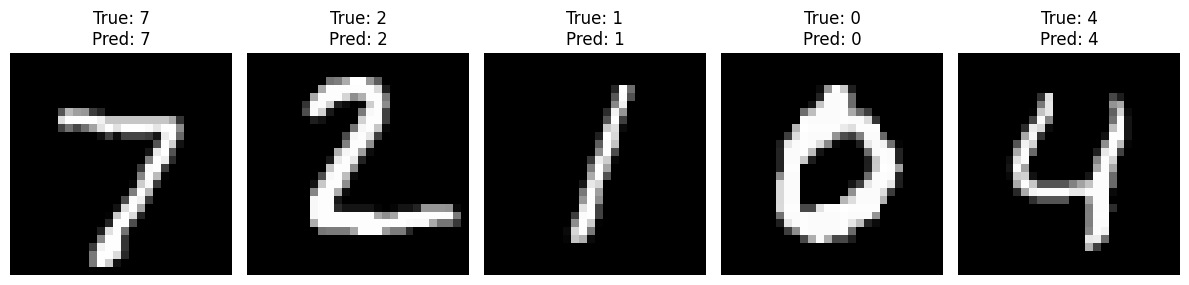

In [5]:
import matplotlib.pyplot as plt

# Take a few images from the test set (not used in training)
num_examples = 5
fig, axes = plt.subplots(1, num_examples, figsize=(12, 3))

model.eval()  # Put model in evaluation mode

with torch.no_grad():  # Don't calculate gradients (faster)
    for i in range(num_examples):
        image, true_label = test_dataset[i]
        
        # Make prediction
        output = model(image.unsqueeze(0))  # Add batch dimension
        predicted_label = output.argmax(dim=1).item()
        
        # Display
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f"True: {true_label}\nPred: {predicted_label}")
        axes[i].axis('off')

plt.tight_layout()
plt.show()